In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer, fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix,
    mean_absolute_error, mean_squared_error, r2_score
)


In [2]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["target"] = data.target   # 0 = malignant, 1 = benign
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


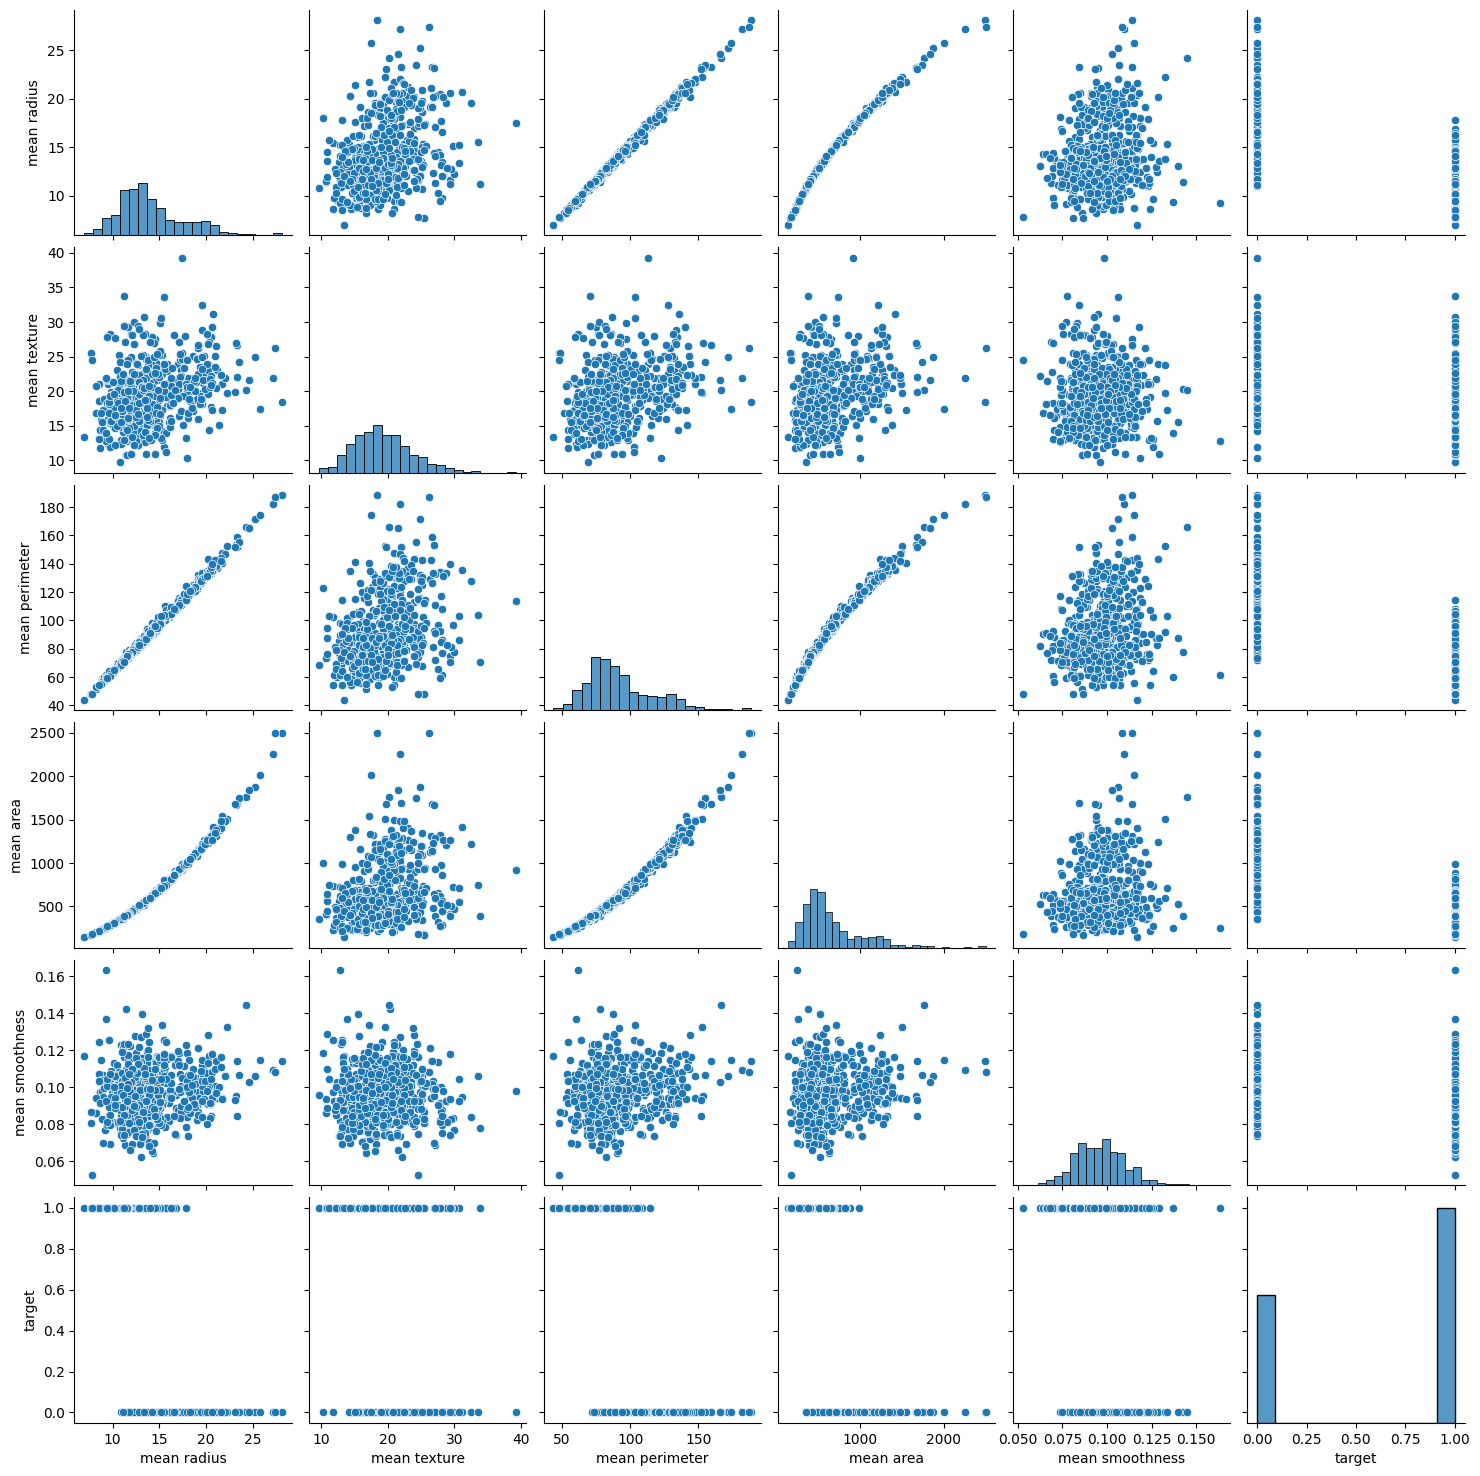

In [3]:
y_class = df["target"]
X = df.iloc[:, :5]   # take first 5 features for simplicity

sns.pairplot(df[X.columns.tolist() + ["target"]])
plt.show()

In [4]:
Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    X, y_class, test_size=0.3, random_state=42
)
scaler = StandardScaler()
Xc_train_s = scaler.fit_transform(Xc_train)
Xc_test_s = scaler.transform(Xc_test)


In [5]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(Xc_train_s, yc_train)
knn_pred = knn.predict(Xc_test_s)

In [6]:
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(Xc_train, yc_train)
dt_pred = dt_clf.predict(Xc_test)

In [7]:
cls_results = pd.DataFrame({
    "Model": ["KNN", "Decision Tree"],
    "Accuracy": [
        accuracy_score(yc_test, knn_pred),
        accuracy_score(yc_test, dt_pred)
    ],
    "Precision": [
        precision_score(yc_test, knn_pred),
        precision_score(yc_test, dt_pred)
    ],
    "Recall": [
        recall_score(yc_test, knn_pred),
        recall_score(yc_test, dt_pred)
    ],
    "F1 Score": [
        f1_score(yc_test, knn_pred),
        f1_score(yc_test, dt_pred)
    ]
})
cls_results


,Model,Accuracy,Precision,Recall,F1 Score
0,KNN,0.929825,0.928571,0.962963,0.945455
1,Decision Tree,0.871345,0.913462,0.879630,0.896226


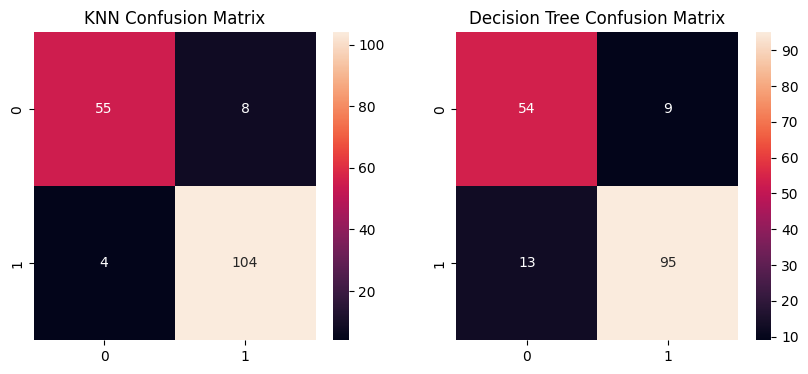

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))

sns.heatmap(confusion_matrix(yc_test, knn_pred),
            annot=True, fmt="d", ax=ax[0])
ax[0].set_title("KNN Confusion Matrix")

sns.heatmap(confusion_matrix(yc_test, dt_pred),
            annot=True, fmt="d", ax=ax[1])
ax[1].set_title("Decision Tree Confusion Matrix")

plt.show()


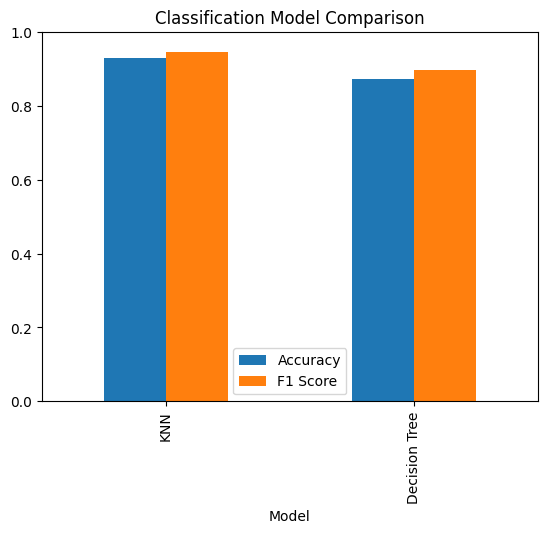

In [9]:
cls_results.set_index("Model")[["Accuracy", "F1 Score"]].plot(kind="bar")
plt.title("Classification Model Comparison")
plt.ylim(0,1)
plt.show()

In [11]:
housing = fetch_california_housing(as_frame=True)
df_r = housing.frame
df_r.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [12]:
y_reg = df_r["MedHouseVal"]
Xr = df_r[["MedInc", "AveRooms", "AveBedrms"]]

In [13]:
Xr_train, Xr_test, yr_train, yr_test = train_test_split(
    Xr, y_reg, test_size=0.3, random_state=42
)


In [14]:
lr = LinearRegression()
lr.fit(df_r[["MedInc"]], y_reg)
lr_pred = lr.predict(df_r[["MedInc"]])


In [15]:
mlr = LinearRegression()
mlr.fit(Xr_train, yr_train)
mlr_pred = mlr.predict(Xr_test)


In [16]:
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(Xr_train, yr_train)
dt_reg_pred = dt_reg.predict(Xr_test)


In [17]:
reg_results = pd.DataFrame({
    "Model": ["Linear", "Multiple Linear", "Decision Tree"],
    "MAE": [
        mean_absolute_error(y_reg, lr_pred),
        mean_absolute_error(yr_test, mlr_pred),
        mean_absolute_error(yr_test, dt_reg_pred)
    ],
    "RMSE": [
        np.sqrt(mean_squared_error(y_reg, lr_pred)),
        np.sqrt(mean_squared_error(yr_test, mlr_pred)),
        np.sqrt(mean_squared_error(yr_test, dt_reg_pred))
    ],
    "R2": [
        r2_score(y_reg, lr_pred),
        r2_score(yr_test, mlr_pred),
        r2_score(yr_test, dt_reg_pred)
    ]
})
reg_results


,Model,MAE,RMSE,R2
0,Linear,0.626259,0.837336,0.473447
1,Multiple Linear,0.590516,0.808089,0.502486
2,Decision Tree,0.764243,1.056869,0.149000


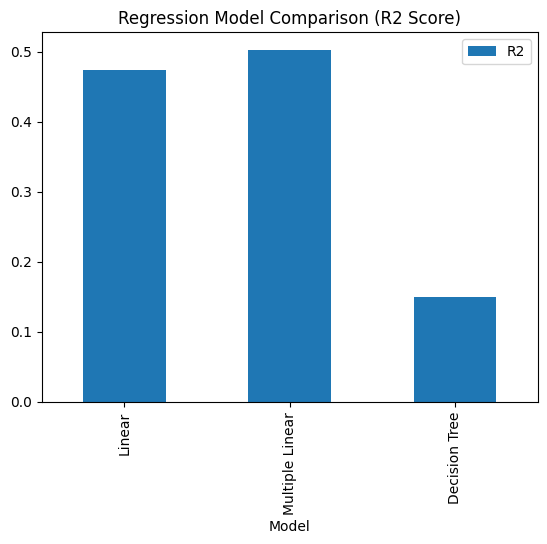

In [18]:
reg_results.set_index("Model")[["R2"]].plot(kind="bar")
plt.title("Regression Model Comparison (R2 Score)")
plt.show()


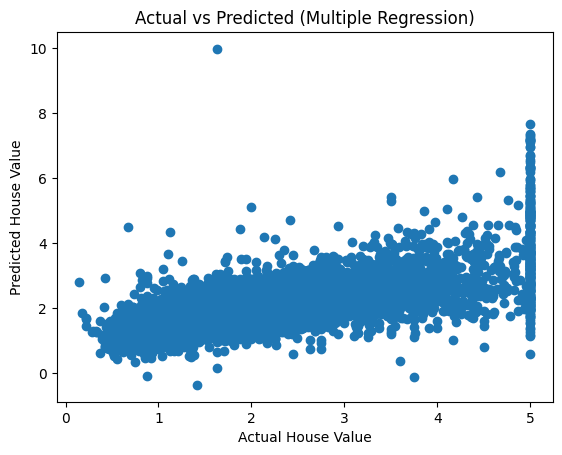

In [19]:
plt.scatter(yr_test, mlr_pred)
plt.xlabel("Actual House Value")
plt.ylabel("Predicted House Value")
plt.title("Actual vs Predicted (Multiple Regression)")
plt.show()
